# Week 5 handin

## 01 Assignment
Here is the text for the assignment linked to

In [ ]:
#Handin exercise for week 5: Pandas¶
#Ex1 Use data from Danmarks Statistik - Databanken
#Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
#Open 'Konsol' and click 'Start Konsol'
#In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
#check the result
#in the code below this same get request is used to get information about all available data tables in 'databanken'.
#Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
#With data aggregation and data visualization answer the following questions:
#What is the change in pct of divorced danes from 2008 to 2020?
#Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
#Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
#Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs

In [ ]:
# 02 Status
#Obligatoriske opgaver er lavet

## 03 Solution part 1

In [2]:
# Exercise 5A: What is the change in pct of divorced danes from 2008 to 2020?
%matplotlib inline
%matplotlib notebook
import random
import csv
import ast
import platform
%matplotlib notebook
import pandas as pd

url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=000&CIVILSTAND=F%2CTOT&Tid=2008K4' \
      '%2C2020K4'

df = pd.read_csv(url, sep=';')

div_pct_2008 = round((df.iloc[0,3] / df.iloc[2,3]) *100,2)
div_pct_2020 = round((df.iloc[1,3]) / df.iloc[3,3] * 100, 2)

x = div_pct_2008
y = div_pct_2020

print(div_pct_2008)
print(div_pct_2020)

change = (((y-x) / x) * 100)
print(change)

print('The divorce percentage has changed by {:.2f}% from {} to {}.'.format(change, x, y))

7.85
9.46
20.509554140127406
The divorce percentage has changed by 20.51% from 7.85 to 9.46.


In [4]:
# Exercise 5B: Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
import pandas as pd


total = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Value&delimiter=Semicolon&OMR%C3%85DE=101%2C751' \
        '%2C461%2C851%2C147&Tid=2020K4 '
ugift = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Value&delimiter=Semicolon&OMR%C3%85DE=101%2C751' \
        '%2C461%2C851%2C147&Tid=2020K4&CIVILSTAND=U '

df_total = pd.read_csv(total, sep=';')
df_ugift = pd.read_csv(ugift, sep=';')
#print(df_total)
#print(df_ugift)

city_transl = { 101: 'København', 751 : 'Aarhus', 461: 'Odense', 851:'Aalborg', 147:'Frederiksberg'}

df_merged = pd.merge(df_total, df_ugift, left_on='OMRÅDE', right_on='OMRÅDE')

df_merged['Ugifte i pct'] = round(df_merged['INDHOLD_y']/df_merged['INDHOLD_x']*100, 2)

answer = df_merged.drop(['INDHOLD_x', 'TID_y', 'CIVILSTAND', 'INDHOLD_y'], axis=1)

cleaned =answer.rename(columns={"OMRÅDE":'By' ,"TID_x": "Tidspkt"})
final = cleaned.sort_values('Ugifte i pct', ascending=False)
print(final)

              By Tidspkt  Ugifte i pct
0      København  2020K4         65.49
1         Aarhus  2020K4         59.94
4  Frederiksberg  2020K4         58.48
2         Odense  2020K4         55.20
3        Aalborg  2020K4         54.82


<IPython.core.display.Javascript object>


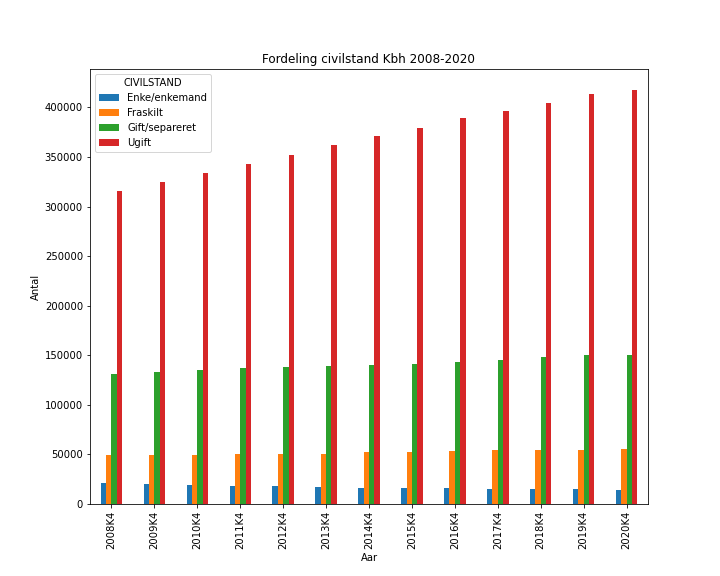

In [6]:
#Ex 5C Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
import pandas as pd
import matplotlib.pyplot as plt


url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Value&delimiter=Semicolon&OMR%C3%85DE=101' \
      '&CIVILSTAND=U%2CG%2CE%2CF&Tid=2008K4%2C2009K4%2C2010K4%2C2011K4%2C2012K4%2C2013K4%2C2014K4%2C2015K4%2C2016K4' \
      '%2C2017K4%2C2018K4%2C2019K4%2C2020K4 '
df = pd.read_csv(url, sep=';')

#print(df)

to_chart = df.pivot(index='TID', columns='CIVILSTAND', values='INDHOLD')
#print(to_chart)

to_chart.plot(kind='bar', figsize=(10, 8))
plt.xlabel('Aar')
plt.ylabel('Antal')
plt.title('Fordeling civilstand Kbh 2008-2020')
plt.show()

<IPython.core.display.Javascript object>


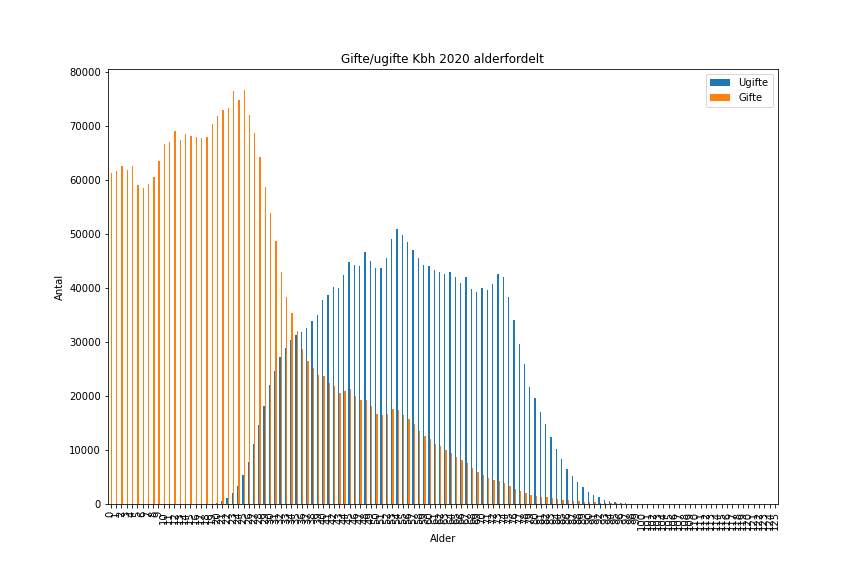

In [8]:
#5D: Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020
import pandas as pd
import matplotlib.pyplot as plt


url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Value&delimiter=Semicolon&OMR%C3%85DE=000' \
      '&CIVILSTAND=U%2CG&Tid=2020K4&ALDER=* '

df = pd.read_csv(url, sep=';')
pd.set_option('display.max_rows', df.shape[0]+1)

gift = df[(df[:]['CIVILSTAND'] != 'Ugift') & (df[:]['ALDER'] != 'I alt')].reset_index(drop='True')
ugift = df[(df[:]['CIVILSTAND'] == 'Ugift') & (df[:]['ALDER'] != 'I alt')].reset_index(drop='True')
pd.set_option('display.max_rows', gift.shape[0]+1)
pd.set_option('display.max_rows', ugift.shape[0]+1)
#print(ugift)
#print(gift)

ts = pd.concat([gift, ugift], axis=1)
ts.plot(kind='bar', figsize=(12,8))
plt.legend(["Ugifte", "Gifte"])
plt.xlabel('Alder')
plt.ylabel('Antal')
plt.title('Gifte/ugifte Kbh 2020 alderfordelt')
plt.show()